# Zaawansowane przetwarzanie obrazu

## Ćwiczenie laboratoryjne – klasyfikacja obrazów przy pomocy sieci konwolucyjnych w scenariuszach z ograniczoną dostępnością danych




## Wstęp

Ostatnio pracowaliśmy na zbiorze danych CIFAR10. Liczność podzbioru treningowego w w nim wynosi 50k obrazów. Chociaż wspomniany zbiór reprezentuje stosunkowo prosty problem – klas do rozpoznania jest tylko 10, obrazy nie są szczególnie dużej rozdzielczości, a same klasy raczej widocznie różnią się pomiędzy sobą (czego nie moglibyśmy powiedzieć np. przy rozpoznawaniu konkretnych ras psów) – to ta ilość nie jest wcale taka duża, i mając więcej podobnych obrazów, uzyskalibyśmy lepsze wyniki.
<br/>
<br/>
<br/>
W praktyce jednak, w realnych scenariuszach, często danych jest jeszcze mniej – a kolejne systemy wykorzystujące deep learning jednak wciąż powstają. Przypadek? Nie sądzę. Może raczej implikacja, że wraz z rozwojem technologii, powstały również metody pozwalające (przynajmniej do pewnego stopnia) poradzić sobie z tym problemem?
<br/>
<br/>
<br/>
Dokładnie tak – i na obecnych zajęciach poznamy właśnie kilka popularnych technik (z różnych dziedzin), które, niezależnie właściwie od rozwiązywanego problemu (czy będzie to klasyfikacja, regresja, segmentacja, czy jeszcze coś innego), pozwolają zredukować ilość danych potrzebnych do skutecznego wytrenowania sieci neuronowych, a także w ogólności uzyskać poprawę wyników osiąganych przez nasze modele.

## "Wzbogacanie danych"

Co można więc zrobić, gdy brakuje nam danych do treningu modeli?

Zebrać ich więcej.

Thank you for coming to my TED talk.

To tyle w tym tygodniu, zapraszam na kolejne zajęcia.

Ale już nie żartując, jest to preferowana metoda rozwiązania problemu, która często nie jest też trudna. Chcemy przykładowo rozpoznawać twarze? Ten problem był już wielokrotnie analizowany na przestrzeni lat, i istnieje wiele publicznych baz danych, z których po prostu możemy odpowiednie dane pobrać. Potrzebny nam model rozróżniający czy zwierzak na obrazie z kamierki jest psem czy kotem, żeby w końcu się dowiedzieć, który z sierściuchów przewraca doniczki pod naszą nieobecność w domu? Wystarczy napisać skrypt, który automatycznie pobierze wyniki dla wyszukiwania w Google Images dla haseł "pies" i "kot".
<br/><br/><br/>
Oczywiście nie zawsze jest to możliwe/proste, lub wiąże się z koniecznością poniesienia wysokich kosztów. Przykładowo, dane medyczne z uwagi na ich wrażliwy charakter nie są już tak często udostępniane publicznie. Dodatkowo, przeważnie są one wykorzystywane do zadań segmentacyjnych różnych struktur/tkanek – które najpierw musi odpowiednio oznaczyć (ręcznie/półautomatycznie) specjalista – co oczywiście kosztuje.
<br/><br/><br/>
Z tego względu, innym podejściem (bardzo popularnym, i w zasadzie obowiązkowo już stosowanym) jest wspomniane "wzbogacanie danych" (data augmentation), które polega na generowaniu z już istniejących danych (chociaż czasami również całkowicie syntetycznie) zupełnie nowych próbek, które swoją charakterystyką są podobne do oryginalnych przykładów. Dla obrazów może to polegać na wykonaniu takich transformacji/operacji jak zwiększenie jasności wszystkich jego pixeli, czy wykonanie lustrzanego odbicia (kot patrzący się w lewo zamiast prawo nie stanie się psem). Zazwyczaj operacje te łączy się ze sobą, co prowadzi do jeszcze większego zróżnicowania wytworzonych obrazów – znacząco wzbogacając zbiór danych wykorzystywanych do treningu.

Wersja graficzna:

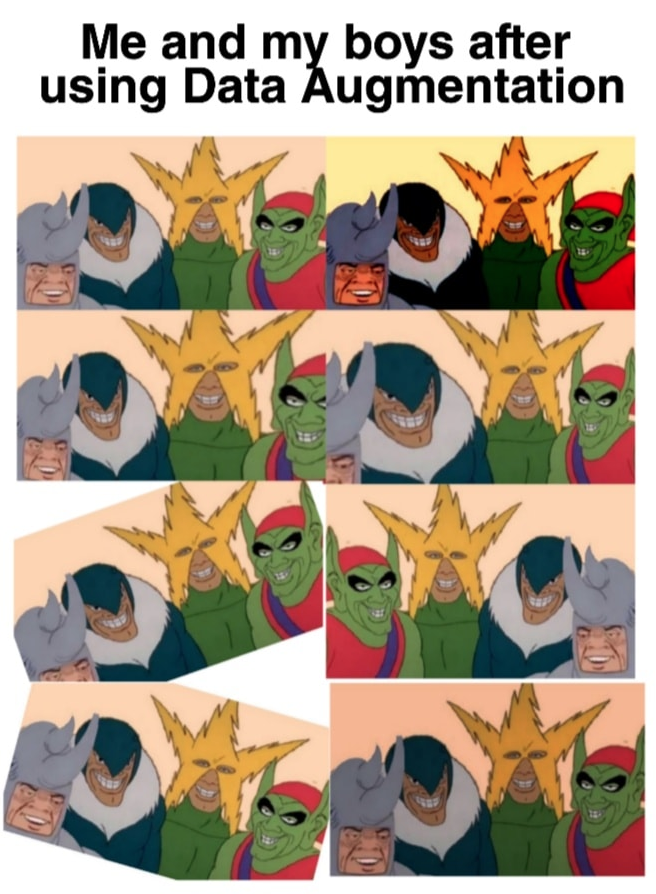

Istnieje wiele bibliotek, dedykowanych do augmentacji różnego rodzaju danych. Dla danych obrazowych, z uwagi na ich popularność w problemach rozwiązywanych przy pomocy deep learningu implementacja podstawowej augmentacji jest zawarta również w samych frameworkach do niego przeznaczonych.


<b>TODO4YOU</b>

W przypadku PyTorch, augmentacje danych obrazowych zaimplementowane są w bibliotece TorchVision.

Korzystając z [dokumentacji](https://pytorch.org/vision/stable/transforms.html) i kodu z poprzednich zajęć:
* Wczytaj/podziel dane z CIFAR10.
* Odpowiednio zmodyfikuj używaną transformację `ToTensor` zastępując ją (w przypadku zbioru treningowego) wybranym zestawem augmentacji.
* Wyświetl przykładowe obrazy aby sprawdzić czy augmentacje działają.


In [ ]:
# Rozpocznijmy od zainstalowania zależności
!pip3 install -U lightning

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 811.0/811.0 kB 26.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 869.5/869.5 kB 46.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 815.2/815.2 kB 44.9 MB/s eta 0:00:00


In [ ]:
import torch
import torchvision.transforms
import torchvision.models

from torch import nn

In [ ]:
# Wypełnij mnie odpowiednio
from torchvision.transforms import v2

transformation = torchvision.transforms.Compose([
    #v2.ElasticTransform(alpha=15.0, sigma=3.0),
    torchvision.transforms.ToTensor()
])
convert_to_tensor = torchvision.transforms.ToTensor()

train_cifar10 = torchvision.datasets.CIFAR10('CIFAR10', download=True, train=True, transform=transformation)
test_cifar10 = torchvision.datasets.CIFAR10('CIFAR10', train=False, transform = convert_to_tensor)

Files already downloaded and verified


In [ ]:
cifar10_classes = ['airplane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [ ]:
print(train_cifar10.data.shape)

(50000, 32, 32, 3)


In [ ]:
print(train_cifar10)

Dataset CIFAR10
    Number of datapoints: 50000
    Root location: CIFAR10
    Split: Train
    StandardTransform
Transform: [ElasticTransform(alpha=[15.0, 15.0], sigma=[3.0, 3.0], interpolation=InterpolationMode.BILINEAR, fill=0), ToTensor()]


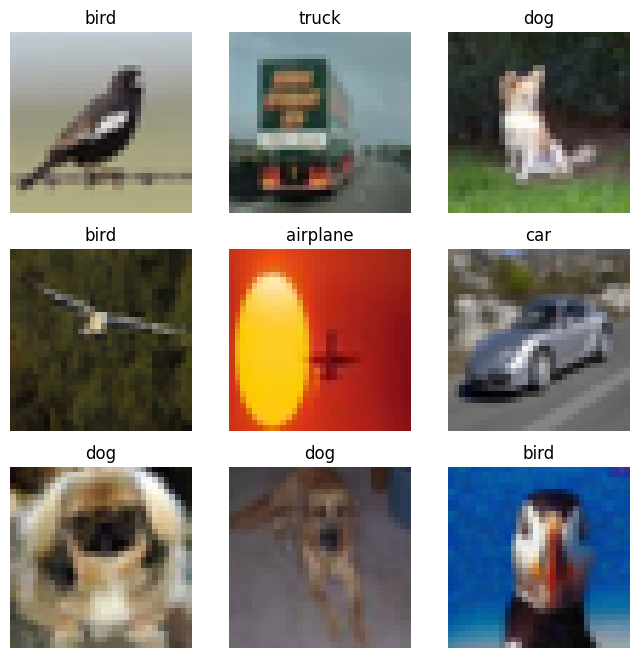

In [ ]:
import matplotlib.pyplot as plt

figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(train_cifar10), size=(1,)).item()
    img, label = train_cifar10[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(cifar10_classes[label])
    plt.axis("off")
    plt.imshow(img.permute(1,2,0).squeeze())
    #plt.imshow(img)
plt.show()

<b>TODO4YOU</b>

Korzystając z kodu z poprzednich zajęć, odtwórz swój najlepszy pod względem uzyskanych wyników model, a następnie ponownie wytrenuj go do klasyfikacji zdjęć z CIFAR10.
* Czy uzyskiwane finalnie wyniki są lepsze/gorsze?
* Jaki jest wpływ na czas/"długość" treningu?
* A jaki na ewentualny overfitting/underfitting?

In [ ]:
# Wypełnij mnie odpowiednio
generator1 = torch.Generator().manual_seed(42)
train_cifar10, val_cifar10 = torch.utils.data.random_split(train_cifar10, [0.9, 0.1], generator=generator1)

In [ ]:
train_loader = torch.utils.data.DataLoader(train_cifar10, batch_size=512, num_workers=2)
val_loader = torch.utils.data.DataLoader(val_cifar10, batch_size=512, num_workers=2)
test_loader = torch.utils.data.DataLoader(test_cifar10, batch_size=512, num_workers=2)

In [ ]:
image_size = 3 * 32 * 32

In [ ]:
import lightning.pytorch as pl
import torchmetrics


class LitModel(pl.LightningModule):
    def __init__(self):
        super().__init__()

        self.network = nn.Sequential(
            nn.Flatten(),

            nn.Linear(in_features=image_size, out_features=512),
            nn.ReLU(inplace=True),

            nn.Linear(in_features=512, out_features=256),
            nn.ReLU(inplace=True),

            nn.Linear(in_features=256, out_features=128),
            nn.ReLU(inplace=True),

            nn.Linear(in_features=128, out_features=len(cifar10_classes))
        )
        self.loss_function = nn.CrossEntropyLoss()
        self.accuracy = torchmetrics.Accuracy(task='multiclass',
                                              num_classes=len(cifar10_classes))

    def forward(self, x):
        return self.network(x)

    def training_step(self, batch, batch_idx):
        inputs, labels = batch
        outputs = self(inputs)
        loss = self.loss_function(outputs, labels)

        self.accuracy.update(outputs, labels)
        self.log('train_loss', loss, prog_bar=True)
        self.log('train_acc', self.accuracy, prog_bar=True)

        return loss

    def validation_step(self, batch, batch_idx):
        inputs, labels = batch
        outputs = self(inputs)
        loss = self.loss_function(outputs, labels)

        self.accuracy.update(outputs, labels)
        self.log('val_loss', loss, prog_bar=True)
        self.log('val_acc', self.accuracy, prog_bar=True)

    def test_step(self, batch, batch_idx):
        inputs, labels = batch
        outputs = self(inputs)
        loss = self.loss_function(outputs, labels)

        self.accuracy.update(outputs, labels)
        self.log('test_loss', loss, prog_bar=True)
        self.log('test_acc', self.accuracy, prog_bar=True)

    def configure_optimizers(self):
        # Tym razem użyjmy optimizera Adam - uczenie powinno być szybsze
        return torch.optim.Adam(self.parameters(), lr=1e-3)

In [ ]:
lightning_model = LitModel()
device = torch.device('cuda')  # skorzystajmy z dobrodziejstw treningu z wykorzystaniem GPU

checkpoint_callback = pl.callbacks.ModelCheckpoint(monitor='val_acc', mode='max', verbose=True)
trainer = pl.Trainer(accelerator='gpu', max_epochs=10, callbacks = [checkpoint_callback])
trainer.fit(lightning_model, train_dataloaders=train_loader, val_dataloaders=val_loader)

INFO: GPU available: True (cuda), used: True
INFO:lightning.pytorch.utilities.rank_zero:GPU available: True (cuda), used: True
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: HPU available: False, using: 0 HPUs
INFO:lightning.pytorch.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning.pytorch.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO: 
  | Name          | Type               | Params | Mode 
-------------------------------------------------------------
0 | network       | Sequential         | 1.7 M  | train
1 | loss_function | CrossEntropyLoss   | 0      | train
2 | accuracy      | MulticlassAccuracy | 0      | train
-------------------------------------------------------------
1.7 M     Trainable params
0         Non-trainable params
1.7 M     Total params
6.956     Total estimated model params size (MB)
11   

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Epoch 0, global step 88: 'val_acc' reached 0.27542 (best 0.27542), saving model to '/content/lightning_logs/version_7/checkpoints/epoch=0-step=88.ckpt' as top 1
INFO:lightning.pytorch.utilities.rank_zero:Epoch 0, global step 88: 'val_acc' reached 0.27542 (best 0.27542), saving model to '/content/lightning_logs/version_7/checkpoints/epoch=0-step=88.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Epoch 1, global step 176: 'val_acc' reached 0.36728 (best 0.36728), saving model to '/content/lightning_logs/version_7/checkpoints/epoch=1-step=176.ckpt' as top 1
INFO:lightning.pytorch.utilities.rank_zero:Epoch 1, global step 176: 'val_acc' reached 0.36728 (best 0.36728), saving model to '/content/lightning_logs/version_7/checkpoints/epoch=1-step=176.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Epoch 2, global step 264: 'val_acc' reached 0.40382 (best 0.40382), saving model to '/content/lightning_logs/version_7/checkpoints/epoch=2-step=264.ckpt' as top 1
INFO:lightning.pytorch.utilities.rank_zero:Epoch 2, global step 264: 'val_acc' reached 0.40382 (best 0.40382), saving model to '/content/lightning_logs/version_7/checkpoints/epoch=2-step=264.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Epoch 3, global step 352: 'val_acc' reached 0.42854 (best 0.42854), saving model to '/content/lightning_logs/version_7/checkpoints/epoch=3-step=352.ckpt' as top 1
INFO:lightning.pytorch.utilities.rank_zero:Epoch 3, global step 352: 'val_acc' reached 0.42854 (best 0.42854), saving model to '/content/lightning_logs/version_7/checkpoints/epoch=3-step=352.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Epoch 4, global step 440: 'val_acc' reached 0.44838 (best 0.44838), saving model to '/content/lightning_logs/version_7/checkpoints/epoch=4-step=440.ckpt' as top 1
INFO:lightning.pytorch.utilities.rank_zero:Epoch 4, global step 440: 'val_acc' reached 0.44838 (best 0.44838), saving model to '/content/lightning_logs/version_7/checkpoints/epoch=4-step=440.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Epoch 5, global step 528: 'val_acc' reached 0.46214 (best 0.46214), saving model to '/content/lightning_logs/version_7/checkpoints/epoch=5-step=528.ckpt' as top 1
INFO:lightning.pytorch.utilities.rank_zero:Epoch 5, global step 528: 'val_acc' reached 0.46214 (best 0.46214), saving model to '/content/lightning_logs/version_7/checkpoints/epoch=5-step=528.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Epoch 6, global step 616: 'val_acc' reached 0.47244 (best 0.47244), saving model to '/content/lightning_logs/version_7/checkpoints/epoch=6-step=616.ckpt' as top 1
INFO:lightning.pytorch.utilities.rank_zero:Epoch 6, global step 616: 'val_acc' reached 0.47244 (best 0.47244), saving model to '/content/lightning_logs/version_7/checkpoints/epoch=6-step=616.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Epoch 7, global step 704: 'val_acc' reached 0.48126 (best 0.48126), saving model to '/content/lightning_logs/version_7/checkpoints/epoch=7-step=704.ckpt' as top 1
INFO:lightning.pytorch.utilities.rank_zero:Epoch 7, global step 704: 'val_acc' reached 0.48126 (best 0.48126), saving model to '/content/lightning_logs/version_7/checkpoints/epoch=7-step=704.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Epoch 8, global step 792: 'val_acc' reached 0.49426 (best 0.49426), saving model to '/content/lightning_logs/version_7/checkpoints/epoch=8-step=792.ckpt' as top 1
INFO:lightning.pytorch.utilities.rank_zero:Epoch 8, global step 792: 'val_acc' reached 0.49426 (best 0.49426), saving model to '/content/lightning_logs/version_7/checkpoints/epoch=8-step=792.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Epoch 9, global step 880: 'val_acc' reached 0.50238 (best 0.50238), saving model to '/content/lightning_logs/version_7/checkpoints/epoch=9-step=880.ckpt' as top 1
INFO:lightning.pytorch.utilities.rank_zero:Epoch 9, global step 880: 'val_acc' reached 0.50238 (best 0.50238), saving model to '/content/lightning_logs/version_7/checkpoints/epoch=9-step=880.ckpt' as top 1
INFO: `Trainer.fit` stopped: `max_epochs=10` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=10` reached.


## Transfer learning

Poznaliśmy i przetestowailśmy już jedną z podstawowych technik radzenia sobie z brakiem danych – przejdźmy do następnej. Jak wiemy (bo wszyscy oglądamy i uważnie słuchamy wykładów, prawda? PRAWDA?) część sieci konwolucyjnej, składająca się z (konwoluujących) warstw konwolucyjnych pełni w zasadzie rolę ekstarktora znaczących cech z obrazów. Chociaż wspomniane cechy "wyuczane" są na potrzeby konkretnego zadania, to wiele z nich jest stosunkowo uniwersalnych – przykładowo krawędzie czy tekstury są obecne w większości obrazów, niezależnie od tego co one reprezentują.
<br/><br/><br/>
Ta myśl doprowadziła nas do eksperymentów mających na celu próbę "transferu" wiedzy – wykorzystania/przeniesienia części (warstw) sieci neuronowej, dobrze wyuczonej do rozwiązywania pewnego zadania (dla którego dostępne jest też dużo danych) oraz zawartej/zakodowanej w niej informacji w celu utworzenia nowych modeli, rozwiązujących zupełnie nowe problemy (dla których często ilość dostępnych danych nie jest satysfakcjonująca).
<br/><br/><br/>
Podejście to sprawdziło się i jest bardzo często wykorzystywane w praktyce – najczęściej przy wykorzystaniu sieci z wagami wytrenowanymi na zbiorach danych, których liczność sięga nawet ponad miliona obrazów – jak np. ImageNet. My również przetestujemy je właśnie w następnej kolejności.

Zarówno TensorFlow, jak i PyTorch zawierają dedykowane subpakiety, pozwalające na szybkie i proste utworzenie i wykorzystanie wielu popularnych architektur sieci neuronowych, jak np. znany z wykładów ResNet (w różnych wariantach) – bez konieczności samodzielnej ich definicji warstwa po warstwie. Dodatkowo, możemy też opcjonalnie pobrać już gotowe/wyuczone wagi dla tych architektur – właśnie w celu wykorzystania ich transferu zakodowanej informacji, według schematu opisanego powyżej.

W przypadku PyTorch, dostęp do nich możemy uzyskać poprzez moduł [<b><i>torchvision.models</i></b>](https://pytorch.org/vision/stable/models.html).

In [ ]:
base_model = torchvision.models.resnet50()

Z takiego modelu można skorzystać analogicznie jak z pojedynczych stworzonych warstw, by utworzyć bardziej skomplikowany model.

In [ ]:
model = torch.nn.Sequential(
  base_model,
  nn.Linear(in_features=1000, out_features=512),
  nn.ReLU(inplace=True),
  nn.Linear(in_features=512, out_features=10)
)

<b>TODO4YOU</b>

Wspomagając się dokumentacją, wczytaj gotowy model z architekturą VGG16, z wagami wyuczonymi na zbiorze ImageNet. Architektura ta ma na końcu warstwy w pełni połączone, odpowiadające za samą klasyfikację tysiąca klas z ImageNetu, dlatego należy dodać warstwę redukującą tę liczbę do odpowiadającej liczbie klas w CIFAR10. Następnie przeprowadź trening i sprawdź jak zmieniają się wartości funkcji kosztu/accuracy na zbiorze traningowym/walidacyjnym, i odpowiedz tak jak poprzednio na pytania:
* Czy uzyskiwane finalnie wyniki są lepsze/gorsze?
* Jaki jest wpływ na czas/"długość" treningu?
* A jaki na ewentualny overfitting/underfitting?


In [ ]:
# Wypełnij mnie odpowiednio
vgg16_model = torchvision.models.vgg16(weights='IMAGENET1K_V1')

full_model = torch.nn.Sequential(
    vgg16_model,
    nn.Linear(in_features=1000, out_features=512),
    nn.ReLU(inplace=True),
    nn.Linear(in_features=512, out_features=10)
)

NameError: name 'torchvision' is not defined

In [ ]:
import lightning.pytorch as pl
import torchmetrics


class LitModel(pl.LightningModule):
    def __init__(self):
        super().__init__()

        self.network = nn.Sequential(
            vgg16_model,
            nn.Linear(in_features=1000, out_features=512),
            nn.ReLU(inplace=True),
            nn.Linear(in_features=512, out_features=10)
        )
        self.loss_function = nn.CrossEntropyLoss()
        self.accuracy = torchmetrics.Accuracy(task='multiclass',
                                              num_classes=len(cifar10_classes))

    def forward(self, x):
        return self.network(x)

    def training_step(self, batch, batch_idx):
        inputs, labels = batch
        outputs = self(inputs)
        loss = self.loss_function(outputs, labels)

        self.accuracy.update(outputs, labels)
        self.log('train_loss', loss, prog_bar=True)
        self.log('train_acc', self.accuracy, prog_bar=True)

        return loss

    def validation_step(self, batch, batch_idx):
        inputs, labels = batch
        outputs = self(inputs)
        loss = self.loss_function(outputs, labels)

        self.accuracy.update(outputs, labels)
        self.log('val_loss', loss, prog_bar=True)
        self.log('val_acc', self.accuracy, prog_bar=True)

    def test_step(self, batch, batch_idx):
        inputs, labels = batch
        outputs = self(inputs)
        loss = self.loss_function(outputs, labels)

        self.accuracy.update(outputs, labels)
        self.log('test_loss', loss, prog_bar=True)
        self.log('test_acc', self.accuracy, prog_bar=True)

    def configure_optimizers(self):
        # Tym razem użyjmy optimizera Adam - uczenie powinno być szybsze
        return torch.optim.Adam(self.parameters(), lr=1e-3)

ModuleNotFoundError: No module named 'lightning'

In [ ]:
lightning_model = LitModel()
device = torch.device('cuda')  # skorzystajmy z dobrodziejstw treningu z wykorzystaniem GPU

checkpoint_callback = pl.callbacks.ModelCheckpoint(monitor='val_acc', mode='max', verbose=True)
trainer = pl.Trainer(accelerator='gpu', max_epochs=10, callbacks = [checkpoint_callback])
trainer.fit(lightning_model, train_dataloaders=train_loader, val_dataloaders=val_loader)

INFO: GPU available: True (cuda), used: True
INFO:lightning.pytorch.utilities.rank_zero:GPU available: True (cuda), used: True
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: HPU available: False, using: 0 HPUs
INFO:lightning.pytorch.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning.pytorch.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO: 
  | Name          | Type               | Params | Mode 
-------------------------------------------------------------
0 | network       | Sequential         | 1.7 M  | train
1 | loss_function | CrossEntropyLoss   | 0      | train
2 | accuracy      | MulticlassAccuracy | 0      | train
-------------------------------------------------------------
1.7 M     Trainable params
0         Non-trainable params
1.7 M     Total params
6.956     Total estimated model params size (MB)
11   

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Epoch 0, global step 88: 'val_acc' reached 0.27602 (best 0.27602), saving model to '/content/lightning_logs/version_8/checkpoints/epoch=0-step=88.ckpt' as top 1
INFO:lightning.pytorch.utilities.rank_zero:Epoch 0, global step 88: 'val_acc' reached 0.27602 (best 0.27602), saving model to '/content/lightning_logs/version_8/checkpoints/epoch=0-step=88.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Epoch 1, global step 176: 'val_acc' reached 0.36648 (best 0.36648), saving model to '/content/lightning_logs/version_8/checkpoints/epoch=1-step=176.ckpt' as top 1
INFO:lightning.pytorch.utilities.rank_zero:Epoch 1, global step 176: 'val_acc' reached 0.36648 (best 0.36648), saving model to '/content/lightning_logs/version_8/checkpoints/epoch=1-step=176.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Epoch 2, global step 264: 'val_acc' reached 0.39870 (best 0.39870), saving model to '/content/lightning_logs/version_8/checkpoints/epoch=2-step=264.ckpt' as top 1
INFO:lightning.pytorch.utilities.rank_zero:Epoch 2, global step 264: 'val_acc' reached 0.39870 (best 0.39870), saving model to '/content/lightning_logs/version_8/checkpoints/epoch=2-step=264.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Epoch 3, global step 352: 'val_acc' reached 0.42286 (best 0.42286), saving model to '/content/lightning_logs/version_8/checkpoints/epoch=3-step=352.ckpt' as top 1
INFO:lightning.pytorch.utilities.rank_zero:Epoch 3, global step 352: 'val_acc' reached 0.42286 (best 0.42286), saving model to '/content/lightning_logs/version_8/checkpoints/epoch=3-step=352.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Epoch 4, global step 440: 'val_acc' reached 0.44228 (best 0.44228), saving model to '/content/lightning_logs/version_8/checkpoints/epoch=4-step=440.ckpt' as top 1
INFO:lightning.pytorch.utilities.rank_zero:Epoch 4, global step 440: 'val_acc' reached 0.44228 (best 0.44228), saving model to '/content/lightning_logs/version_8/checkpoints/epoch=4-step=440.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Epoch 5, global step 528: 'val_acc' reached 0.46032 (best 0.46032), saving model to '/content/lightning_logs/version_8/checkpoints/epoch=5-step=528.ckpt' as top 1
INFO:lightning.pytorch.utilities.rank_zero:Epoch 5, global step 528: 'val_acc' reached 0.46032 (best 0.46032), saving model to '/content/lightning_logs/version_8/checkpoints/epoch=5-step=528.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Epoch 6, global step 616: 'val_acc' reached 0.47384 (best 0.47384), saving model to '/content/lightning_logs/version_8/checkpoints/epoch=6-step=616.ckpt' as top 1
INFO:lightning.pytorch.utilities.rank_zero:Epoch 6, global step 616: 'val_acc' reached 0.47384 (best 0.47384), saving model to '/content/lightning_logs/version_8/checkpoints/epoch=6-step=616.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Epoch 7, global step 704: 'val_acc' reached 0.48248 (best 0.48248), saving model to '/content/lightning_logs/version_8/checkpoints/epoch=7-step=704.ckpt' as top 1
INFO:lightning.pytorch.utilities.rank_zero:Epoch 7, global step 704: 'val_acc' reached 0.48248 (best 0.48248), saving model to '/content/lightning_logs/version_8/checkpoints/epoch=7-step=704.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Epoch 8, global step 792: 'val_acc' reached 0.48888 (best 0.48888), saving model to '/content/lightning_logs/version_8/checkpoints/epoch=8-step=792.ckpt' as top 1
INFO:lightning.pytorch.utilities.rank_zero:Epoch 8, global step 792: 'val_acc' reached 0.48888 (best 0.48888), saving model to '/content/lightning_logs/version_8/checkpoints/epoch=8-step=792.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Epoch 9, global step 880: 'val_acc' reached 0.49722 (best 0.49722), saving model to '/content/lightning_logs/version_8/checkpoints/epoch=9-step=880.ckpt' as top 1
INFO:lightning.pytorch.utilities.rank_zero:Epoch 9, global step 880: 'val_acc' reached 0.49722 (best 0.49722), saving model to '/content/lightning_logs/version_8/checkpoints/epoch=9-step=880.ckpt' as top 1
INFO: `Trainer.fit` stopped: `max_epochs=10` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=10` reached.


<b>TODO4YOU</b>

Wczytaj modele ResNet i VGG16. Korzystając z biblioteki [torchinfo](https://github.com/TylerYep/torchinfo) sprawdź jak dla naszego rozmiaru wejścia wyglądają rozmiary map cech w kolejnych warstwach. Dlaczego ResNet, mimo że jest "młodszy" od VGG16 i zawiera nowsze mechanizmy (jak np. skip connections) jest dla naszego konkretnego zbioru danych raczej gorszym wyborem?

In [ ]:
# Wypełnij mnie odpowiednio

<b>TODO4YOU</b>

Tym razem spróbuj wykorzystać jedną z gotowych/dostępnych architektur – ale bez wczytania przetrenowanych wag. Jakie są wyniki treningu przy próbie "wyuczenia" takiej sieci "od zera"?

In [ ]:
# Showtime!

<b>TODO4YOU</b>

Połącz oba nowopoznane w ramach zajęć podejścia – spróbuj wytrenować model korzystając równocześnie z augmentacji danych, jak i z transfer learningu.
Jakie są wyniki takiego treningu? Czy podejścia te wzajemnie się wykluczają, czy też można je łączyć?

In [ ]:
# Showtime!

## Zadanie jeszcze-bardziej-domowe

Poznaliśmy już w zasadzie najbardziej podstawowe "go-to" narzędzia do treningu nowych klasyfikatorów – natomiast zazwyczaj nie wystarczy ich zastosowanie "od tak" w dowolnej konfiguracji. Stosowane wzbogacanie danych może dawać lepsze lub gorsze wyniki w zależności od tego jakie transformacje dobierzemy. Transfer learning dla różnych zastosowanych architektur da różne wyniki.

Przechodząc do konkretów, zadanie jest proste (przynajmniej w treści):

"Wraz z odkrywaniem coraz to nowszych Pokemonów i zwiększeniem liczby ich znanych gatunków, system wbudowany w Pokedex, służący do ich identyfikacji, zaczął coraz bardziej szwankować. Profesor Oak postanowił więc zmienić technologię na której jest on oparty. Jednym z podejść, które postanowił przetestować (poza losowym wyborem nazwy pokemona z puli wszystkich dostępnych), są właśnie modele klasyfikacji obrazów, oparte na deep learningu. Profesor jednakże nie ma zbyt wielkiego doświadczenia w ich implementacji, w związku z tym poprosił o pomoc ciebie. Ty, skuszona/y pracą z tak wielkim naukowcem, oraz atrakcyjnym wynagrodzeniem (wpisem do CV) oczywiście zgodziłaś/eś się pomóc!

W ramach testów możliwości potencjalnego rozwiązania, profesor dostarczył różne zdjęcia pokemonów, przy pomocy których stworzony był oryginalny model identyfikacji (jeszcze z czasów pierwszej generacji, kiedy liczba gatunków Pokemonów miała jedynkę z przodu). Dane dostępne są tutaj: https://chmura.put.poznan.pl/s/VzQ9FE71KnPedEO

Wykorzystaj je, aby zostać najlepszym trenerem <s>pokemonów</s> modeli do rozpoznawania pokemonów w Alabastii!

Sugestie odnośnie tego co można sprawdzić podczas pracy nad modelem (oczywiście jest opcja aby wyjść poza nie):
* różne architektury przy transfer learningu,
* różne konfiguracje transformacji stosowanych podczas augmentacji obrazów (choć tu raczej nie należy przesadzać, z racji tego, że i tak są one dość małe i raczej wycentrowane),
* wydłużenie czasu treningu (w zależności od pozostałych ustawień, [EarlyStopping](https://pytorch-lightning.readthedocs.io/en/stable/common/early_stopping.html) z patience 5 czy nawet 10 może kończyć trening trochę za wcześnie),
* różne sposoby przygotowania danych wejściowych: normalizacja/standaryzacja,
* nieprzerabiane na laboratoriach dotychczas: [zmniejszanie learning rate wraz z przebiegiem treningu](https://pytorch-lightning.readthedocs.io/en/stable/api/pytorch_lightning.core.LightningModule.html#pytorch_lightning.core.LightningModule.configure_optimizers), gdy wyniki przestają się poprawiać – aby lepiej dopasować wagi modelu. Można to zrealizować przy pomocy [ReduceLROnPlateau](https://pytorch-lightning.readthedocs.io/en/stable/api/pytorch_lightning.core.LightningModule.html#pytorch_lightning.core.LightningModule.configure_optimizers).

In [ ]:
!wget -O pokemon-generation-one-split.zip https://chmura.put.poznan.pl/s/VzQ9FE71KnPedEO/download